Importing necessary required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load train and test data

In [12]:
train = pd.read_csv('train_v9rqX0R.csv')
test = pd.read_csv('test_AbJTz2l.csv')

In [ ]:
test_original = pd.read_csv('test_AbJTz2l.csv')

 Exploratory Data Analysis

In [13]:
#view the details inside the training set
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [14]:
#view the details inside test data
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [15]:
#viewing the shape of the data
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


In [16]:
#viewing the overall info about the dataset
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [17]:
#viewing the columns and its datatypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [18]:
#viewing missing data in the set 
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [19]:
# checking the different items in Item Idemtifier

train['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

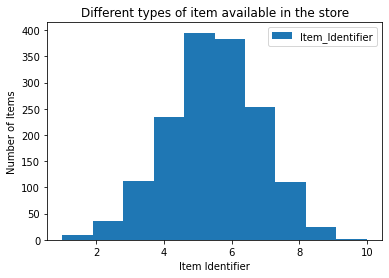

In [20]:
# checking the different items in Item Idemtifier
train['Item_Identifier'].value_counts(normalize = True)
train['Item_Identifier'].value_counts().plot.hist()
plt.title('Different types of item available in the store')
plt.xlabel('Item Identifier')
plt.ylabel('Number of Items')
plt.legend()
plt.show()


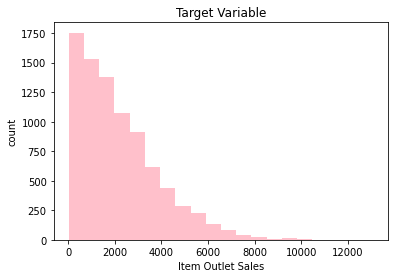

In [21]:
#data visualization of target variable
plt.hist(train['Item_Outlet_Sales'], bins = 20, color = 'pink')
plt.title('Target Variable')
plt.xlabel('Item Outlet Sales')
plt.ylabel('count')
plt.show()

In [22]:
# checking the different items in Item Fat Content

train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

low fat is marked as both Low Fat,LF,and low fat .Regular is marked as both Reg and Regular

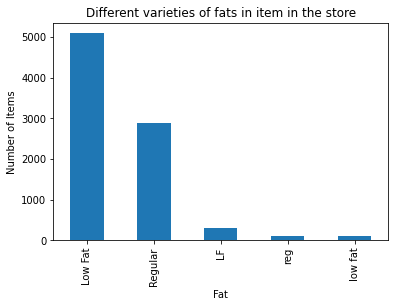

In [23]:
train['Item_Fat_Content'].value_counts(normalize = True)
train['Item_Fat_Content'].value_counts().plot.bar()
plt.title('Different varieties of fats in item in the store')
plt.xlabel('Fat')
plt.ylabel('Number of Items')
plt.show()


In [24]:
# checking the different items in Item Type

train['Item_Type'].value_counts()


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

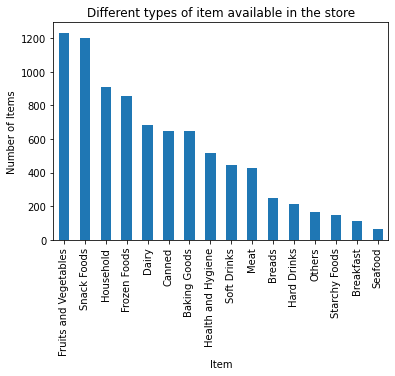

In [25]:

train['Item_Type'].value_counts(normalize = True)
train['Item_Type'].value_counts().plot.bar()
plt.title('Different types of item available in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()


In [26]:
# checking the different types of Outlet Identifier

train['Outlet_Identifier'].value_counts()


OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

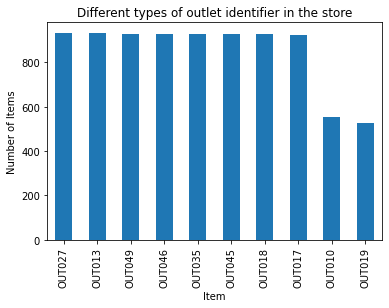

In [27]:
train['Outlet_Identifier'].value_counts(normalize = True)
train['Outlet_Identifier'].value_counts().plot.bar()
plt.title('Different types of outlet identifier in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [28]:
# checking the different types of Outlet Size

train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

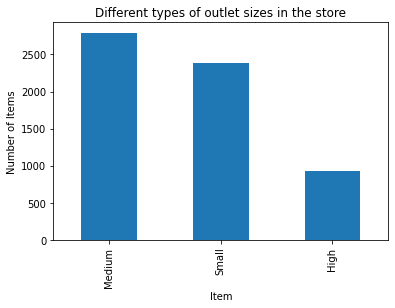

In [29]:
train['Outlet_Size'].value_counts(normalize = True)
train['Outlet_Size'].value_counts().plot.bar()
plt.title('Different types of outlet sizes in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [30]:
# checking different types of items in Outlet Location Type

train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

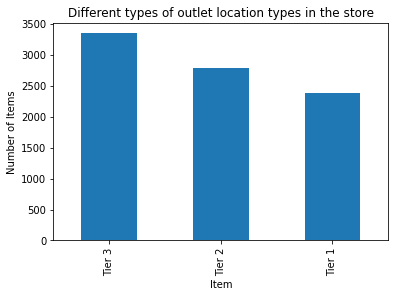

In [31]:
train['Outlet_Location_Type'].value_counts(normalize = True)
train['Outlet_Location_Type'].value_counts().plot.bar()
plt.title('Different types of outlet location types in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()


In [32]:
# checking different types of item in Outlet Type

train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

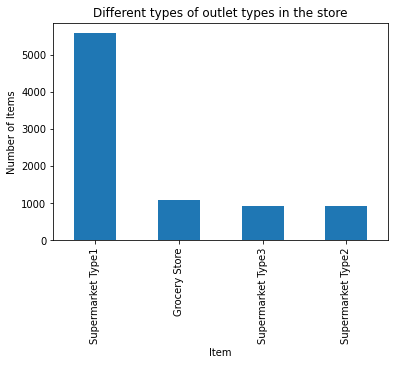

In [33]:
train['Outlet_Type'].value_counts(normalize = True)
train['Outlet_Type'].value_counts().plot.bar()
plt.title('Different types of outlet types in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [34]:
#viewing only the categorical values in the dataset
categorial_features = train.select_dtypes(include=[object])

In [35]:
categorial_features

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [36]:
#viewing the numerical values in the dataset
numerical_features = train.select_dtypes(include=[float])

In [37]:
numerical_features

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.300,0.016047,249.8092,3735.1380
1,5.920,0.019278,48.2692,443.4228
2,17.500,0.016760,141.6180,2097.2700
3,19.200,0.000000,182.0950,732.3800
4,8.930,0.000000,53.8614,994.7052
...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834
8519,8.380,0.046982,108.1570,549.2850
8520,10.600,0.035186,85.1224,1193.1136
8521,7.210,0.145221,103.1332,1845.5976


# **Data Preprocessing**

In [38]:
#before doing preprocessing combining both train and test data
data = pd.concat([train, test],ignore_index=True)

In [39]:
print(train.shape)
print(test.shape)
print(data.shape)

(8523, 12)
(5681, 11)
(14204, 12)


In [40]:
#checking for null values
data.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

From the data exploratory analysis it is understood that there are missing values in the item weight and outlet size .Need to replace the missing values

In [41]:
#replacing missing values for weight
#finding different values exist for weight
data['Item_Weight'].value_counts()

17.600    135
12.150    127
10.500    123
13.650    115
11.800    113
         ... 
7.640       7
5.905       7
7.850       6
4.615       6
9.035       6
Name: Item_Weight, Length: 415, dtype: int64

In [42]:
data['Item_Weight'].min()

4.555

Text(0.5, 1.0, 'Item_Weight')

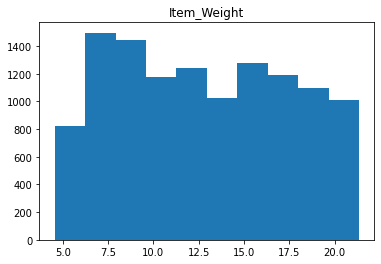

In [43]:
#plotting the weight graph to see the skew
plt.hist(data['Item_Weight'])
plt.title('Item_Weight')

Since it is normally distributed we can replace missing values with mean .Before that make sure there are no outliers .

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


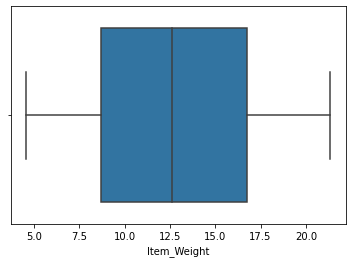

In [44]:
sns.boxplot(data.Item_Weight)

Since there are no outliers we can use mean for replacing values

In [45]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace = True)

In [46]:
#checking whether the missing values are replaced or not
data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

Missing values are replaced for Item_Weight and now replacing missing values for Outlet_Size

In [47]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace = True)

In [48]:
#checking whether the missing values are replaced or not
data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [49]:
data.Item_Outlet_Sales = data.Item_Outlet_Sales.fillna(data.Item_Outlet_Sales.mean())

In [50]:
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

On data analysis it is found that

low fat is marked as both Low Fat,LF,and low fat .Regular is marked as both Reg and Regular

We need to make it one tag

In [51]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [52]:
different_items = data['Item_Identifier'].unique()

In [53]:
different_items

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

There are lots of unique values in item identifier we can classify it into diff categories based on the code starts .Find unique value for the 3 characters of the code

In [54]:
data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x: x[0:3])

In [55]:
different_items = data['Item_Identifier'].unique()

In [56]:
different_items

array(['FDA', 'DRC', 'FDN', 'FDX', 'NCD', 'FDP', 'FDO', 'FDH', 'FDU',
       'FDY', 'FDS', 'FDF', 'NCB', 'DRI', 'FDW', 'FDC', 'FDR', 'FDV',
       'DRJ', 'FDE', 'NCS', 'DRH', 'NCX', 'DRZ', 'FDB', 'FDK', 'FDL',
       'FDM', 'NCP', 'NCL', 'DRK', 'FDI', 'FDZ', 'NCI', 'FDJ', 'FDG',
       'NCZ', 'FDQ', 'FDD', 'DRG', 'NCR', 'FDT', 'DRB', 'DRE', 'DRA',
       'NCF', 'NCH', 'NCO', 'NCN', 'NCC', 'DRD', 'DRF', 'DRL', 'NCM',
       'NCU', 'DRY', 'NCW', 'DRM', 'NCT', 'NCQ', 'DRP', 'DRQ', 'NCK',
       'NCY', 'DRN', 'NCA', 'NCE', 'NCJ', 'NCV', 'NCG', 'DRO'],
      dtype=object)

In [ ]:
# we can reduce it to 2 digits and see the count

In [57]:
data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x: x[0:2])

In [58]:
different_items = data['Item_Identifier'].unique()

In [59]:
different_items

array(['FD', 'DR', 'NC'], dtype=object)

We can classify this into these 3 categories 

In [60]:
data['Item_Identifier'].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Identifier, dtype: int64

In [61]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NC,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [69]:
# label encoding

from sklearn.preprocessing import LabelEncoder

data = data.apply(LabelEncoder().fit_transform)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  int64  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  int64  
 9   Outlet_Location_Type       14204 non-null  int64  
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  Outlet                     14204 non-null  int64  
dtypes: float64(4), int64(5), object(4)
memory usag

In [70]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet,Item_Identifier_DR,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,284,0,1097,7567,4,1,0,2541,9,0,...,0,0,0,0,0,1,0,1,0,0
1,57,1,1436,632,8,1,2,422,3,1,...,0,0,0,0,0,0,0,0,1,0
2,376,0,1172,3897,4,1,0,1639,9,0,...,0,0,0,0,0,1,0,1,0,0
3,393,1,0,5626,3,1,2,670,0,0,...,0,0,0,0,0,0,1,0,0,0
4,265,0,0,848,1,0,2,865,1,0,...,0,0,0,0,0,0,0,1,0,0


In [71]:
# one hot encoding

data = pd.get_dummies(data)

print(data.shape)

(14204, 42)


In [72]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet,Item_Identifier_DR,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,284,0,1097,7567,4,1,0,2541,9,0,...,0,0,0,0,0,1,0,1,0,0
1,57,1,1436,632,8,1,2,422,3,1,...,0,0,0,0,0,0,0,0,1,0
2,376,0,1172,3897,4,1,0,1639,9,0,...,0,0,0,0,0,1,0,1,0,0
3,393,1,0,5626,3,1,2,670,0,0,...,0,0,0,0,0,0,1,0,0,0
4,265,0,0,848,1,0,2,865,1,0,...,0,0,0,0,0,0,0,1,0,0


In [73]:
data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Item_Outlet_Sales', 'Outlet', 'Item_Identifier_DR',
       'Item_Identifier_FD', 'Item_Identifier_NC', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',

In [74]:
data.shape

(14204, 42)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Item_Weight                      14204 non-null  int64
 1   Item_Fat_Content                 14204 non-null  int64
 2   Item_Visibility                  14204 non-null  int64
 3   Item_MRP                         14204 non-null  int64
 4   Outlet_Establishment_Year        14204 non-null  int64
 5   Outlet_Size                      14204 non-null  int64
 6   Outlet_Location_Type             14204 non-null  int64
 7   Item_Outlet_Sales                14204 non-null  int64
 8   Outlet                           14204 non-null  int64
 9   Item_Identifier_DR               14204 non-null  int64
 10  Item_Identifier_FD               14204 non-null  int64
 11  Item_Identifier_NC               14204 non-null  int64
 12  Item_Type_Baking Goods           14204 non-nul

In [89]:
train_after = data.iloc[:8523,:]
test_after = data.iloc[8523:,:]

In [91]:
train_after.shape

(8523, 42)

In [92]:
test_after.shape

(5681, 42)

In [ ]:
test.shape

(5681, 45)

In [79]:
#All are numerical values now we can split the dependent and target variables
y = data.Item_Outlet_Sales
x = data.drop('Item_Outlet_Sales', axis = 1)


In [80]:
#splitting data for training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

# **Modelling**

# **Linear Regression**

In [81]:
#importing linear model and metrics for finding the error in the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [82]:
#fitting model on train data
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [83]:
#predicting result on test data
y_pred = model.predict(x_test)
print(y_pred)

[1558.63200373 1448.12549495 1572.73720803 ... 1436.58202769 1336.05829948
 1402.11670391]


In [84]:
# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print('RMSE :', np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

RMSE : 569.6548827896418
Variance score: 0.38


RMSE is too high

In [94]:
#try to get the pediction results for linear regression model
test_x = test_after.drop('Item_Outlet_Sales', axis = 1)

In [95]:
test_y_pred = model.predict(test_x)

In [96]:
test_y_pred.shape

(5681,)

In [107]:
#defined common function to fit,predict check the value and export the result
from sklearn.model_selection import cross_val_score
def modelfit(alg, x_test, y_test,x_train, y_train, IDcol, filename,testoriginaldata,test_x,target):
    #Fit the algorithm on the data
    alg.fit(x_train, y_train)
        
    #Predict training set:
    y_predictions = alg.predict(x_test)

    #Perform cross-validation:
    cv_score = cross_val_score(alg, x_train, y_train, cv=20)
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    mse = mean_squared_error(y_test, y_predictions)
    print('RMSE :', np.sqrt(mse))
    print('Variance score: %.2f' % r2_score(y_test, y_predictions))
    
    #Predict on testing data:
    testoriginaldata[target] = alg.predict(test_x)
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: testoriginaldata[x] for x in IDcol})
    submission.to_csv(filename, index=False)

In [98]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']

In [102]:
#linear regression with common func

modelfit(LinearRegression(),x_test,y_test,x_train, y_train,IDcol,'linearregressionresult.csv',test_original,test_x,target)


Model Report
RMSE : 569.6548827896418
Variance score: 0.38


# **Decision Tree Regressor**

In [108]:
#importing decision tree regressor
from sklearn.tree import DecisionTreeRegressor
modelfit(DecisionTreeRegressor(max_depth=15,min_samples_leaf=300),x_test,y_test,x_train, y_train,IDcol,'decisiontree_regressionresult.csv',test_original,test_x,target)


Model Report
RMSE : 564.0606751598665
Variance score: 0.39


# **Random Forest Model**

In [110]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
modelfit(regressor,x_test,y_test,x_train, y_train,IDcol,'randomforest_regressionresult.csv',test_original,test_x,target)


Model Report
RMSE : 561.2815461114646
Variance score: 0.40


# **AdaBoost Regressor**

In [111]:
from sklearn.ensemble import AdaBoostRegressor

adaboostregressor= AdaBoostRegressor(n_estimators = 100)
modelfit(adaboostregressor,x_test,y_test,x_train, y_train,IDcol,'adaboost_regressionresult.csv',test_original,test_x,target)


Model Report
RMSE : 566.730986650158
Variance score: 0.38


# **Support vector machine**

In [112]:
from sklearn.svm import SVR

svmmodel = SVR()
modelfit(svmmodel,x_test,y_test,x_train, y_train,IDcol,'svm_regressionresult.csv',test_original,test_x,target)


Model Report
RMSE : 728.0252135048777
Variance score: -0.02


# **XgBoost Regressor**

In [113]:
from sklearn.ensemble import GradientBoostingRegressor

boosting = GradientBoostingRegressor()
modelfit(boosting,x_test,y_test,x_train, y_train,IDcol,'boosting_regressionresult.csv',test_original,test_x,target)


Model Report
RMSE : 563.2681976340863
Variance score: 0.39


# **Hyper parameter tuning on adaboost model**

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
ada=AdaBoostRegressor()
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=crossvalidation)
 

In [116]:
search.fit(x,y)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=AdaBoostRegressor(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [500, 1000, 2000],
                         'random_state': [1]},
             scoring='neg_mean_squared_error')

In [122]:
search.best_params_

{'learning_rate': 0.01, 'n_estimators': 2000, 'random_state': 1}

In [123]:
from sklearn.ensemble import AdaBoostRegressor

adaboostregressor= AdaBoostRegressor(n_estimators = 2000,learning_rate=0.01,random_state= 1)
modelfit(adaboostregressor,x_test,y_test,x_train, y_train,IDcol,'adaboost_regressionresult_best.csv',test_original,test_x,target)


Model Report
RMSE : 565.4660987071175
Variance score: 0.39
